# Microsoft Movie Analysis

**Author:** [Gustavo Villagrana](mailto:gusvilla303@gmail.com)
***

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Microsoft-Movie-Analysis" data-toc-modified-id="Microsoft-Movie-Analysis-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Microsoft Movie Analysis</a></span><ul class="toc-item"><li><span><a href="#Overview" data-toc-modified-id="Overview-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Overview</a></span></li><li><span><a href="#Business-Problem" data-toc-modified-id="Business-Problem-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Business Problem</a></span></li></ul></li><li><span><a href="#Data" data-toc-modified-id="Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data</a></span><ul class="toc-item"><li><span><a href="#Data-Understanding" data-toc-modified-id="Data-Understanding-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Data Understanding</a></span><ul class="toc-item"><li><span><a href="#Previewing-the-Data" data-toc-modified-id="Previewing-the-Data-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Previewing the Data</a></span></li></ul></li><li><span><a href="#Preparing-and-Cleaning-the-Title-and-Ratings-Data" data-toc-modified-id="Preparing-and-Cleaning-the-Title-and-Ratings-Data-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Preparing and Cleaning the Title and Ratings Data</a></span><ul class="toc-item"><li><span><a href="#Preparing-and-Cleaning-Movie-Gross-Data" data-toc-modified-id="Preparing-and-Cleaning-Movie-Gross-Data-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Preparing and Cleaning Movie Gross Data</a></span></li></ul></li><li><span><a href="#Joining-the-Data" data-toc-modified-id="Joining-the-Data-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Joining the Data</a></span><ul class="toc-item"><li><span><a href="#Remove-Duplicate-Titles-in-Data" data-toc-modified-id="Remove-Duplicate-Titles-in-Data-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Remove Duplicate Titles in Data</a></span></li></ul></li></ul></li><li><span><a href="#Analysis" data-toc-modified-id="Analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Analysis</a></span><ul class="toc-item"><li><span><a href="#Which-Genres-Are-Most-Profitable?" data-toc-modified-id="Which-Genres-Are-Most-Profitable?-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Which Genres Are Most Profitable?</a></span><ul class="toc-item"><li><span><a href="#Preparing-Genre-Data" data-toc-modified-id="Preparing-Genre-Data-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Preparing Genre Data</a></span></li><li><span><a href="#Group-by-List-of-Genres" data-toc-modified-id="Group-by-List-of-Genres-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Group by List of Genres</a></span></li><li><span><a href="#Plot-Genres-vs-Total-Gross-Earnings" data-toc-modified-id="Plot-Genres-vs-Total-Gross-Earnings-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>Plot Genres vs Total Gross Earnings</a></span></li><li><span><a href="#Finding-#1:-Top-Grossing-Genres" data-toc-modified-id="Finding-#1:-Top-Grossing-Genres-3.1.4"><span class="toc-item-num">3.1.4&nbsp;&nbsp;</span>Finding #1: Top Grossing Genres</a></span></li></ul></li><li><span><a href="#Do-Runtime-Minutes-Influence-Gross-Earnings?" data-toc-modified-id="Do-Runtime-Minutes-Influence-Gross-Earnings?-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Do Runtime Minutes Influence Gross Earnings?</a></span><ul class="toc-item"><li><span><a href="#Plot-Runtimes-vs-Total-Gross-Earnings" data-toc-modified-id="Plot-Runtimes-vs-Total-Gross-Earnings-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Plot Runtimes vs Total Gross Earnings</a></span></li><li><span><a href="#Finding-#2:-Runtime-Minutes-and-Total-Gross-Earnings" data-toc-modified-id="Finding-#2:-Runtime-Minutes-and-Total-Gross-Earnings-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Finding #2: Runtime Minutes and Total Gross Earnings</a></span></li></ul></li><li><span><a href="#Does-Production-Budget-Affect-Gross-Earnings?" data-toc-modified-id="Does-Production-Budget-Affect-Gross-Earnings?-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Does Production Budget Affect Gross Earnings?</a></span><ul class="toc-item"><li><span><a href="#Plot-Total-Gross-vs-Budget-and-Genres" data-toc-modified-id="Plot-Total-Gross-vs-Budget-and-Genres-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Plot Total Gross vs Budget and Genres</a></span></li><li><span><a href="#Finding-#3:-Production-Budgets-and-Total-Gross-Earnings" data-toc-modified-id="Finding-#3:-Production-Budgets-and-Total-Gross-Earnings-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Finding #3: Production Budgets and Total Gross Earnings</a></span></li></ul></li></ul></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Conclusions</a></span><ul class="toc-item"><li><span><a href="#Next-Steps" data-toc-modified-id="Next-Steps-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Next Steps</a></span></li></ul></li></ul></div>

## Overview
***
This project analyzes the types of films that are currently doing the best at the box office to help the head of Microsoft's new movie studio decide what type of films to create. Since this is Microsoft's first time creating films, it is critical that the best option is clearly identified in order to optimize this investment opportunity. 



## Business Problem
***
Microsoft wants to create a new movie studio to produce original content but needs help in identifying what type of films are performing best at the box office. By identifying the best performing films, Microsoft will be able to leverage its investment resources and maximize its profitability. 

# Data

## Data Understanding
***
The data used in this our analysis are primarily sourced from the IMBd web site, which is considered one of the best online movie databases available. Every movie has columns for a unique ID, primary and original titles, runtime minutes, genre(s), and domestic/foreign gross earnings. 

In [2]:
# Import standard packages
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import seaborn as sns


### Previewing the Data

#### Title Basics data

In [3]:
# Title Basics data

title_basics_df = pd.read_csv('data/imdb.title.basics.csv.gz')
title_basics_df.rename(columns={'tconst': 'movie_id'}, inplace=True)
title_basics_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.00,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.00,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,nan,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.00,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.00,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,nan,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,nan,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.00,NaN


In [4]:
title_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


#### Title Ratings data

In [5]:
# Title Ratings data

title_ratings_df = pd.read_csv('data/imdb.title.ratings.csv.gz')
title_ratings_df.rename(columns={'tconst': 'movie_id'}, inplace=True)
title_ratings_df

,movie_id,averagerating,numvotes
0,tt10356526,8.30,31
1,tt10384606,8.90,559
2,tt1042974,6.40,20
3,tt1043726,4.20,50352
4,tt1060240,6.50,21
...,...,...,...
73851,tt9805820,8.10,25
73852,tt9844256,7.50,24
73853,tt9851050,4.70,14
73854,tt9886934,7.00,5


In [6]:
title_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


#### Movie Gross data

In [7]:
# Movie Gross data

movie_gross_df = pd.read_csv('data/bom.movie_gross.csv.gz')
movie_gross_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,"415,000,000.00",652000000,2010
1,Alice in Wonderland (2010),BV,"334,200,000.00",691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,"296,000,000.00",664300000,2010
3,Inception,WB,"292,600,000.00",535700000,2010
4,Shrek Forever After,P/DW,"238,700,000.00",513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,"6,200.00",NaN,2018
3383,Edward II (2018 re-release),FM,"4,800.00",NaN,2018
3384,El Pacto,Sony,"2,500.00",NaN,2018
3385,The Swan,Synergetic,"2,400.00",NaN,2018


In [8]:
movie_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


#### Movie Budget data

In [9]:
movie_budget_df = pd.read_csv("data/tn.movie_budgets.csv.gz")
movie_budget_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [10]:
movie_budget_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


## Preparing and Cleaning the Title and Ratings Data

In [11]:
# Joined Title Basics df and Title Ratings df ON movie_id 

basics_with_ratings_df = title_basics_df.join(title_ratings_df.set_index('movie_id'), on='movie_id')
basics_with_ratings_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.00,"Action,Crime,Drama",7.00,77.00
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00,"Biography,Drama",7.20,43.00
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.00,Drama,6.90,"4,517.00"
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,nan,"Comedy,Drama",6.10,13.00
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.00,"Comedy,Drama,Fantasy",6.50,119.00
...,...,...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.00,Drama,nan,nan
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,nan,Documentary,nan,nan
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,nan,Comedy,nan,nan
146142,tt9916730,6 Gunn,6 Gunn,2017,116.00,NaN,nan,nan


In [12]:
# Rename 'primary_title' column to 'title'

basics_with_ratings_df.rename(columns={'primary_title': 'title'}, inplace=True)
basics_with_ratings_df

,movie_id,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.00,"Action,Crime,Drama",7.00,77.00
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00,"Biography,Drama",7.20,43.00
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.00,Drama,6.90,"4,517.00"
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,nan,"Comedy,Drama",6.10,13.00
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.00,"Comedy,Drama,Fantasy",6.50,119.00
...,...,...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.00,Drama,nan,nan
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,nan,Documentary,nan,nan
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,nan,Comedy,nan,nan
146142,tt9916730,6 Gunn,6 Gunn,2017,116.00,NaN,nan,nan


### Preparing and Cleaning Movie Gross Data

In [13]:
# Sort Movie Gross data by domestic gross in descending order to get check if my data makes sense

movie_gross_sorted_df = movie_gross_df.sort_values(by=['domestic_gross'], ascending=False)
movie_gross_sorted_df  

,title,studio,domestic_gross,foreign_gross,year
1872,Star Wars: The Force Awakens,BV,"936,700,000.00","1,131.6",2015
3080,Black Panther,BV,"700,100,000.00",646900000,2018
3079,Avengers: Infinity War,BV,"678,800,000.00","1,369.5",2018
1873,Jurassic World,Uni.,"652,300,000.00","1,019.4",2015
727,Marvel's The Avengers,BV,"623,400,000.00",895500000,2012
...,...,...,...,...,...
1975,Surprise - Journey To The West,AR,nan,49600000,2015
2392,Finding Mr. Right 2,CL,nan,114700000,2016
2468,Solace,LGP,nan,22400000,2016
2595,Viral,W/Dim.,nan,552000,2016


In [14]:
# Remove commas from df['foreign_gross'] column in order to convert type to float

movie_gross_sorted_df['foreign_gross'].replace(',','', regex=True, inplace=True)
movie_gross_sorted_df

,title,studio,domestic_gross,foreign_gross,year
1872,Star Wars: The Force Awakens,BV,"936,700,000.00",1131.6,2015
3080,Black Panther,BV,"700,100,000.00",646900000,2018
3079,Avengers: Infinity War,BV,"678,800,000.00",1369.5,2018
1873,Jurassic World,Uni.,"652,300,000.00",1019.4,2015
727,Marvel's The Avengers,BV,"623,400,000.00",895500000,2012
...,...,...,...,...,...
1975,Surprise - Journey To The West,AR,nan,49600000,2015
2392,Finding Mr. Right 2,CL,nan,114700000,2016
2468,Solace,LGP,nan,22400000,2016
2595,Viral,W/Dim.,nan,552000,2016


In [15]:
# Convert foreign_gross data type from string to float

movie_gross_sorted_df['foreign_gross'] = movie_gross_sorted_df['foreign_gross'].astype(float)
movie_gross_sorted_df

,title,studio,domestic_gross,foreign_gross,year
1872,Star Wars: The Force Awakens,BV,"936,700,000.00","1,131.60",2015
3080,Black Panther,BV,"700,100,000.00","646,900,000.00",2018
3079,Avengers: Infinity War,BV,"678,800,000.00","1,369.50",2018
1873,Jurassic World,Uni.,"652,300,000.00","1,019.40",2015
727,Marvel's The Avengers,BV,"623,400,000.00","895,500,000.00",2012
...,...,...,...,...,...
1975,Surprise - Journey To The West,AR,nan,"49,600,000.00",2015
2392,Finding Mr. Right 2,CL,nan,"114,700,000.00",2016
2468,Solace,LGP,nan,"22,400,000.00",2016
2595,Viral,W/Dim.,nan,"552,000.00",2016


In [16]:
movie_gross_sorted_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3387 entries, 1872 to 2825
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 158.8+ KB


## Joining the Data

In [17]:
# Join the (Basics with Ratings) dataframe with the Movie Gross data using the 
# 'title' column to have original titles, runtime minutes, 
# and domestic/foreign gross earnings available in the same dataframe. 

basics_ratings_gross_df = basics_with_ratings_df.join(movie_gross_sorted_df.set_index('title'), how='inner', on='title')
basics_ratings_gross_df

,movie_id,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
38,tt0315642,Wazir,Wazir,2016,103.00,"Action,Crime,Drama",7.10,"15,378.00",Relbig.,"1,100,000.00",nan,2016
48,tt0337692,On the Road,On the Road,2012,124.00,"Adventure,Drama,Romance",6.10,"37,886.00",IFC,"744,000.00","8,000,000.00",2012
39490,tt2404548,On the Road,On the Road,2011,90.00,Drama,nan,nan,IFC,"744,000.00","8,000,000.00",2012
68078,tt3872966,On the Road,On the Road,2013,87.00,Documentary,nan,nan,IFC,"744,000.00","8,000,000.00",2012
76007,tt4339118,On the Road,On the Road,2014,89.00,Drama,6.00,6.00,IFC,"744,000.00","8,000,000.00",2012
...,...,...,...,...,...,...,...,...,...,...,...,...
133797,tt8404272,How Long Will I Love U,Chao shi kong tong ju,2018,101.00,Romance,6.50,607.00,WGUSA,"747,000.00","82,100,000.00",2018
134045,tt8427036,Helicopter Eela,Helicopter Eela,2018,135.00,Drama,5.40,673.00,Eros,"72,000.00",nan,2018
137854,tt8851262,Spring Fever,Spring Fever,2019,nan,"Comedy,Horror",nan,nan,Strand,"10,800.00","150,000.00",2010
140171,tt9078374,Last Letter,"Ni hao, Zhihua",2018,114.00,"Drama,Romance",6.40,322.00,CL,"181,000.00",nan,2018


In [18]:
basics_ratings_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3366 entries, 38 to 140826
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         3366 non-null   object 
 1   title            3366 non-null   object 
 2   original_title   3366 non-null   object 
 3   start_year       3366 non-null   int64  
 4   runtime_minutes  3198 non-null   float64
 5   genres           3326 non-null   object 
 6   averagerating    3027 non-null   float64
 7   numvotes         3027 non-null   float64
 8   studio           3363 non-null   object 
 9   domestic_gross   3342 non-null   float64
 10  foreign_gross    2043 non-null   float64
 11  year             3366 non-null   int64  
dtypes: float64(5), int64(2), object(5)
memory usage: 341.9+ KB


In [19]:
# Drop all NaN values from basic_ratings_gross dataframe since NaN values will
# produce inaccurate results. 

df_without_nan = basics_ratings_gross_df.dropna()
df_without_nan

,movie_id,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
48,tt0337692,On the Road,On the Road,2012,124.00,"Adventure,Drama,Romance",6.10,"37,886.00",IFC,"744,000.00","8,000,000.00",2012
76007,tt4339118,On the Road,On the Road,2014,89.00,Drama,6.00,6.00,IFC,"744,000.00","8,000,000.00",2012
96791,tt5647250,On the Road,On the Road,2016,121.00,Drama,5.70,127.00,IFC,"744,000.00","8,000,000.00",2012
54,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.00,"Adventure,Comedy,Drama",7.30,"275,300.00",Fox,"58,200,000.00","129,900,000.00",2013
58,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.00,"Action,Crime,Drama",6.50,"105,116.00",Uni.,"26,300,000.00","26,900,000.00",2014
...,...,...,...,...,...,...,...,...,...,...,...,...
126784,tt7752454,Detective Chinatown 2,Tang ren jie tan an 2,2018,121.00,"Action,Comedy,Mystery",6.10,"1,250.00",WB,"2,000,000.00","542,100,000.00",2018
127205,tt7784604,Hereditary,Hereditary,2018,127.00,"Drama,Horror,Mystery",7.30,"151,571.00",A24,"44,100,000.00","35,300,000.00",2018
130621,tt8097306,Nobody's Fool,Nobody's Fool,2018,110.00,"Comedy,Drama,Romance",4.60,"3,618.00",Par.,"31,700,000.00","1,800,000.00",2018
133797,tt8404272,How Long Will I Love U,Chao shi kong tong ju,2018,101.00,Romance,6.50,607.00,WGUSA,"747,000.00","82,100,000.00",2018


In [20]:
# Add a new column 'total_gross' to sum domestic_gross and foreign_gross values

df_without_nan['total_gross'] = df_without_nan['domestic_gross'] + df_without_nan['foreign_gross']
df_without_nan

<ipython-input-20-36e71d45e168>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_without_nan['total_gross'] = df_without_nan['domestic_gross'] + df_without_nan['foreign_gross']


,movie_id,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year,total_gross
48,tt0337692,On the Road,On the Road,2012,124.00,"Adventure,Drama,Romance",6.10,"37,886.00",IFC,"744,000.00","8,000,000.00",2012,"8,744,000.00"
76007,tt4339118,On the Road,On the Road,2014,89.00,Drama,6.00,6.00,IFC,"744,000.00","8,000,000.00",2012,"8,744,000.00"
96791,tt5647250,On the Road,On the Road,2016,121.00,Drama,5.70,127.00,IFC,"744,000.00","8,000,000.00",2012,"8,744,000.00"
54,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.00,"Adventure,Comedy,Drama",7.30,"275,300.00",Fox,"58,200,000.00","129,900,000.00",2013,"188,100,000.00"
58,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.00,"Action,Crime,Drama",6.50,"105,116.00",Uni.,"26,300,000.00","26,900,000.00",2014,"53,200,000.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
126784,tt7752454,Detective Chinatown 2,Tang ren jie tan an 2,2018,121.00,"Action,Comedy,Mystery",6.10,"1,250.00",WB,"2,000,000.00","542,100,000.00",2018,"544,100,000.00"
127205,tt7784604,Hereditary,Hereditary,2018,127.00,"Drama,Horror,Mystery",7.30,"151,571.00",A24,"44,100,000.00","35,300,000.00",2018,"79,400,000.00"
130621,tt8097306,Nobody's Fool,Nobody's Fool,2018,110.00,"Comedy,Drama,Romance",4.60,"3,618.00",Par.,"31,700,000.00","1,800,000.00",2018,"33,500,000.00"
133797,tt8404272,How Long Will I Love U,Chao shi kong tong ju,2018,101.00,Romance,6.50,607.00,WGUSA,"747,000.00","82,100,000.00",2018,"82,847,000.00"


In [21]:
df_without_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1767 entries, 48 to 140826
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         1767 non-null   object 
 1   title            1767 non-null   object 
 2   original_title   1767 non-null   object 
 3   start_year       1767 non-null   int64  
 4   runtime_minutes  1767 non-null   float64
 5   genres           1767 non-null   object 
 6   averagerating    1767 non-null   float64
 7   numvotes         1767 non-null   float64
 8   studio           1767 non-null   object 
 9   domestic_gross   1767 non-null   float64
 10  foreign_gross    1767 non-null   float64
 11  year             1767 non-null   int64  
 12  total_gross      1767 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 193.3+ KB


In [22]:
# Sort by total_gross by DESC to see if my data make sense

df_without_nan = df_without_nan.sort_values(by='total_gross', ascending=False)
df_without_nan.head(10)

,movie_id,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year,total_gross
39010,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.00,"Action,Adventure,Sci-Fi",7.30,"665,594.00",BV,"459,000,000.00","946,400,000.00",2015,"1,405,400,000.00"
19050,tt1825683,Black Panther,Black Panther,2018,134.00,"Action,Adventure,Sci-Fi",7.30,"516,148.00",BV,"700,100,000.00","646,900,000.00",2018,"1,347,000,000.00"
42223,tt2527336,Star Wars: The Last Jedi,Star Wars: Episode VIII - The Last Jedi,2017,152.00,"Action,Adventure,Fantasy",7.10,"462,903.00",BV,"620,200,000.00","712,400,000.00",2017,"1,332,600,000.00"
84414,tt4881806,Jurassic World: Fallen Kingdom,Jurassic World: Fallen Kingdom,2018,128.00,"Action,Adventure,Sci-Fi",6.20,"219,125.00",Uni.,"417,700,000.00","891,800,000.00",2018,"1,309,500,000.00"
6647,tt1323045,Frozen,Frozen,2010,93.00,"Adventure,Drama,Sport",6.20,"62,311.00",BV,"400,700,000.00","875,700,000.00",2013,"1,276,400,000.00"
10824,tt1611845,Frozen,Wai nei chung ching,2010,92.00,"Fantasy,Romance",5.40,75.00,BV,"400,700,000.00","875,700,000.00",2013,"1,276,400,000.00"
35107,tt2294629,Frozen,Frozen,2013,102.00,"Adventure,Animation,Comedy",7.50,"516,998.00",BV,"400,700,000.00","875,700,000.00",2013,"1,276,400,000.00"
62741,tt3606756,Incredibles 2,Incredibles 2,2018,118.00,"Action,Adventure,Animation",7.70,"203,510.00",BV,"608,600,000.00","634,200,000.00",2018,"1,242,800,000.00"
6453,tt1300854,Iron Man 3,Iron Man Three,2013,130.00,"Action,Adventure,Sci-Fi",7.20,"692,794.00",BV,"409,000,000.00","805,800,000.00",2013,"1,214,800,000.00"
35077,tt2293640,Minions,Minions,2015,91.00,"Adventure,Animation,Comedy",6.40,"193,917.00",Uni.,"336,000,000.00","823,400,000.00",2015,"1,159,400,000.00"


### Remove Duplicate Titles in Data

In [23]:
# Use original_title to check for duplicates

df_without_nan.duplicated(subset=['original_title']).sum()  

156

In [24]:
# Drop all duplicates using original_title column

df_no_duplicates = df_without_nan.drop_duplicates(subset=['original_title'])
df_no_duplicates

,movie_id,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year,total_gross
39010,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.00,"Action,Adventure,Sci-Fi",7.30,"665,594.00",BV,"459,000,000.00","946,400,000.00",2015,"1,405,400,000.00"
19050,tt1825683,Black Panther,Black Panther,2018,134.00,"Action,Adventure,Sci-Fi",7.30,"516,148.00",BV,"700,100,000.00","646,900,000.00",2018,"1,347,000,000.00"
42223,tt2527336,Star Wars: The Last Jedi,Star Wars: Episode VIII - The Last Jedi,2017,152.00,"Action,Adventure,Fantasy",7.10,"462,903.00",BV,"620,200,000.00","712,400,000.00",2017,"1,332,600,000.00"
84414,tt4881806,Jurassic World: Fallen Kingdom,Jurassic World: Fallen Kingdom,2018,128.00,"Action,Adventure,Sci-Fi",6.20,"219,125.00",Uni.,"417,700,000.00","891,800,000.00",2018,"1,309,500,000.00"
6647,tt1323045,Frozen,Frozen,2010,93.00,"Adventure,Drama,Sport",6.20,"62,311.00",BV,"400,700,000.00","875,700,000.00",2013,"1,276,400,000.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
112563,tt6599340,Bluebeard,Haebing,2017,117.00,Thriller,6.40,"1,269.00",Strand,"33,500.00","5,200.00",2010,"38,700.00"
71753,tt4096620,Troublemakers: The Story of Land Art,Troublemakers: The Story of Land Art,2015,72.00,"Biography,Documentary,History",6.50,108.00,FRun,"29,500.00","9,100.00",2016,"38,600.00"
24172,tt1978447,Policeman,Ha-shoter,2011,105.00,Drama,6.20,766.00,Crnth,"11,300.00","27,000.00",2014,"38,300.00"
7416,tt1417067,Cirkus Columbia,Cirkus Columbia,2010,113.00,"Comedy,Drama,Romance",7.30,"2,336.00",Strand,"3,500.00","9,500.00",2012,"13,000.00"


# Analysis

## Which Genres Are Most Profitable?

### Preparing Genre Data

In [25]:
# Use the most complete and accurate dataframe to start Genre analysis
# Note that a movie can be associated with more than one genre 

df_no_duplicates

,movie_id,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year,total_gross
39010,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.00,"Action,Adventure,Sci-Fi",7.30,"665,594.00",BV,"459,000,000.00","946,400,000.00",2015,"1,405,400,000.00"
19050,tt1825683,Black Panther,Black Panther,2018,134.00,"Action,Adventure,Sci-Fi",7.30,"516,148.00",BV,"700,100,000.00","646,900,000.00",2018,"1,347,000,000.00"
42223,tt2527336,Star Wars: The Last Jedi,Star Wars: Episode VIII - The Last Jedi,2017,152.00,"Action,Adventure,Fantasy",7.10,"462,903.00",BV,"620,200,000.00","712,400,000.00",2017,"1,332,600,000.00"
84414,tt4881806,Jurassic World: Fallen Kingdom,Jurassic World: Fallen Kingdom,2018,128.00,"Action,Adventure,Sci-Fi",6.20,"219,125.00",Uni.,"417,700,000.00","891,800,000.00",2018,"1,309,500,000.00"
6647,tt1323045,Frozen,Frozen,2010,93.00,"Adventure,Drama,Sport",6.20,"62,311.00",BV,"400,700,000.00","875,700,000.00",2013,"1,276,400,000.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
112563,tt6599340,Bluebeard,Haebing,2017,117.00,Thriller,6.40,"1,269.00",Strand,"33,500.00","5,200.00",2010,"38,700.00"
71753,tt4096620,Troublemakers: The Story of Land Art,Troublemakers: The Story of Land Art,2015,72.00,"Biography,Documentary,History",6.50,108.00,FRun,"29,500.00","9,100.00",2016,"38,600.00"
24172,tt1978447,Policeman,Ha-shoter,2011,105.00,Drama,6.20,766.00,Crnth,"11,300.00","27,000.00",2014,"38,300.00"
7416,tt1417067,Cirkus Columbia,Cirkus Columbia,2010,113.00,"Comedy,Drama,Romance",7.30,"2,336.00",Strand,"3,500.00","9,500.00",2012,"13,000.00"


In [26]:
df_no_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1611 entries, 39010 to 133711
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         1611 non-null   object 
 1   title            1611 non-null   object 
 2   original_title   1611 non-null   object 
 3   start_year       1611 non-null   int64  
 4   runtime_minutes  1611 non-null   float64
 5   genres           1611 non-null   object 
 6   averagerating    1611 non-null   float64
 7   numvotes         1611 non-null   float64
 8   studio           1611 non-null   object 
 9   domestic_gross   1611 non-null   float64
 10  foreign_gross    1611 non-null   float64
 11  year             1611 non-null   int64  
 12  total_gross      1611 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 176.2+ KB


In [27]:
# Iterate through all movies and store the genre value(s) in a list
# under a new column 'list_of_genres'

df_no_duplicates['list_of_genres'] = df_no_duplicates['genres'].map(lambda x: x.split(','))
df_no_duplicates

<ipython-input-27-2a6824381f8b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_duplicates['list_of_genres'] = df_no_duplicates['genres'].map(lambda x: x.split(','))


,movie_id,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year,total_gross,list_of_genres
39010,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.00,"Action,Adventure,Sci-Fi",7.30,"665,594.00",BV,"459,000,000.00","946,400,000.00",2015,"1,405,400,000.00","[Action, Adventure, Sci-Fi]"
19050,tt1825683,Black Panther,Black Panther,2018,134.00,"Action,Adventure,Sci-Fi",7.30,"516,148.00",BV,"700,100,000.00","646,900,000.00",2018,"1,347,000,000.00","[Action, Adventure, Sci-Fi]"
42223,tt2527336,Star Wars: The Last Jedi,Star Wars: Episode VIII - The Last Jedi,2017,152.00,"Action,Adventure,Fantasy",7.10,"462,903.00",BV,"620,200,000.00","712,400,000.00",2017,"1,332,600,000.00","[Action, Adventure, Fantasy]"
84414,tt4881806,Jurassic World: Fallen Kingdom,Jurassic World: Fallen Kingdom,2018,128.00,"Action,Adventure,Sci-Fi",6.20,"219,125.00",Uni.,"417,700,000.00","891,800,000.00",2018,"1,309,500,000.00","[Action, Adventure, Sci-Fi]"
6647,tt1323045,Frozen,Frozen,2010,93.00,"Adventure,Drama,Sport",6.20,"62,311.00",BV,"400,700,000.00","875,700,000.00",2013,"1,276,400,000.00","[Adventure, Drama, Sport]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112563,tt6599340,Bluebeard,Haebing,2017,117.00,Thriller,6.40,"1,269.00",Strand,"33,500.00","5,200.00",2010,"38,700.00",[Thriller]
71753,tt4096620,Troublemakers: The Story of Land Art,Troublemakers: The Story of Land Art,2015,72.00,"Biography,Documentary,History",6.50,108.00,FRun,"29,500.00","9,100.00",2016,"38,600.00","[Biography, Documentary, History]"
24172,tt1978447,Policeman,Ha-shoter,2011,105.00,Drama,6.20,766.00,Crnth,"11,300.00","27,000.00",2014,"38,300.00",[Drama]
7416,tt1417067,Cirkus Columbia,Cirkus Columbia,2010,113.00,"Comedy,Drama,Romance",7.30,"2,336.00",Strand,"3,500.00","9,500.00",2012,"13,000.00","[Comedy, Drama, Romance]"


In [28]:
# Use explode() method on 'list_of_genres' to separate each genre for movies
# associated with multiple genres. 

genres_df = df_no_duplicates.explode('list_of_genres')
genres_df

,movie_id,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year,total_gross,list_of_genres
39010,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.00,"Action,Adventure,Sci-Fi",7.30,"665,594.00",BV,"459,000,000.00","946,400,000.00",2015,"1,405,400,000.00",Action
39010,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.00,"Action,Adventure,Sci-Fi",7.30,"665,594.00",BV,"459,000,000.00","946,400,000.00",2015,"1,405,400,000.00",Adventure
39010,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.00,"Action,Adventure,Sci-Fi",7.30,"665,594.00",BV,"459,000,000.00","946,400,000.00",2015,"1,405,400,000.00",Sci-Fi
19050,tt1825683,Black Panther,Black Panther,2018,134.00,"Action,Adventure,Sci-Fi",7.30,"516,148.00",BV,"700,100,000.00","646,900,000.00",2018,"1,347,000,000.00",Action
19050,tt1825683,Black Panther,Black Panther,2018,134.00,"Action,Adventure,Sci-Fi",7.30,"516,148.00",BV,"700,100,000.00","646,900,000.00",2018,"1,347,000,000.00",Adventure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24172,tt1978447,Policeman,Ha-shoter,2011,105.00,Drama,6.20,766.00,Crnth,"11,300.00","27,000.00",2014,"38,300.00",Drama
7416,tt1417067,Cirkus Columbia,Cirkus Columbia,2010,113.00,"Comedy,Drama,Romance",7.30,"2,336.00",Strand,"3,500.00","9,500.00",2012,"13,000.00",Comedy
7416,tt1417067,Cirkus Columbia,Cirkus Columbia,2010,113.00,"Comedy,Drama,Romance",7.30,"2,336.00",Strand,"3,500.00","9,500.00",2012,"13,000.00",Drama
7416,tt1417067,Cirkus Columbia,Cirkus Columbia,2010,113.00,"Comedy,Drama,Romance",7.30,"2,336.00",Strand,"3,500.00","9,500.00",2012,"13,000.00",Romance


In [29]:
# Sort total_gross values to see which genre is highest grossing
# Note movies with multiple genres return a row for each genre

genres_df_sorted = genres_df.sort_values('total_gross', ascending=False)
genres_df_sorted

,movie_id,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year,total_gross,list_of_genres
39010,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.00,"Action,Adventure,Sci-Fi",7.30,"665,594.00",BV,"459,000,000.00","946,400,000.00",2015,"1,405,400,000.00",Action
39010,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.00,"Action,Adventure,Sci-Fi",7.30,"665,594.00",BV,"459,000,000.00","946,400,000.00",2015,"1,405,400,000.00",Sci-Fi
39010,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.00,"Action,Adventure,Sci-Fi",7.30,"665,594.00",BV,"459,000,000.00","946,400,000.00",2015,"1,405,400,000.00",Adventure
19050,tt1825683,Black Panther,Black Panther,2018,134.00,"Action,Adventure,Sci-Fi",7.30,"516,148.00",BV,"700,100,000.00","646,900,000.00",2018,"1,347,000,000.00",Action
19050,tt1825683,Black Panther,Black Panther,2018,134.00,"Action,Adventure,Sci-Fi",7.30,"516,148.00",BV,"700,100,000.00","646,900,000.00",2018,"1,347,000,000.00",Sci-Fi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24172,tt1978447,Policeman,Ha-shoter,2011,105.00,Drama,6.20,766.00,Crnth,"11,300.00","27,000.00",2014,"38,300.00",Drama
7416,tt1417067,Cirkus Columbia,Cirkus Columbia,2010,113.00,"Comedy,Drama,Romance",7.30,"2,336.00",Strand,"3,500.00","9,500.00",2012,"13,000.00",Comedy
7416,tt1417067,Cirkus Columbia,Cirkus Columbia,2010,113.00,"Comedy,Drama,Romance",7.30,"2,336.00",Strand,"3,500.00","9,500.00",2012,"13,000.00",Drama
7416,tt1417067,Cirkus Columbia,Cirkus Columbia,2010,113.00,"Comedy,Drama,Romance",7.30,"2,336.00",Strand,"3,500.00","9,500.00",2012,"13,000.00",Romance


### Group by List of Genres

In [30]:
# Group movies by genres and reset the index so we can work with 'list_of_genres'

genres_grouped = genres_df_sorted.groupby('list_of_genres', as_index=False).mean()
genres_grouped

,list_of_genres,start_year,runtime_minutes,averagerating,numvotes,domestic_gross,foreign_gross,year,total_gross
0,Action,"2,013.88",115.79,6.45,"172,342.82","84,500,842.32","152,599,331.53","2,014.00","237,100,173.85"
1,Adventure,"2,014.05",111.63,6.53,"186,731.08","115,370,967.62","216,239,289.27","2,014.15","331,610,256.88"
2,Animation,"2,013.83",95.75,6.65,"97,394.55","103,809,254.15","198,225,983.32","2,014.14","302,035,237.48"
3,Biography,"2,014.27",116.88,7.05,"97,812.85","34,842,936.98","45,010,646.58","2,014.50","79,853,583.55"
4,Comedy,"2,013.38",104.24,6.27,"81,820.78","50,769,254.87","75,514,780.48","2,013.57","126,284,035.35"
5,Crime,"2,013.30",111.53,6.51,"106,802.40","35,375,337.55","38,477,943.11","2,013.47","73,853,280.66"
6,Documentary,"2,013.08",86.68,7.15,"9,095.72","20,283,924.60","22,353,069.23","2,013.09","42,636,993.83"
7,Drama,"2,013.36",112.96,6.67,"81,253.93","27,018,583.51","41,075,728.46","2,013.61","68,094,311.97"
8,Family,"2,013.05",102.84,6.11,"66,908.72","62,868,786.08","95,720,269.62","2,013.03","158,589,055.70"
9,Fantasy,"2,013.54",111.37,6.27,"141,008.69","72,506,915.69","148,318,592.56","2,013.74","220,825,508.26"


### Plot Genres vs Total Gross Earnings

In [31]:
# Filter out the top 10 total grossing genres 

top_10_movie_gross = genres_grouped.nlargest(10, 'total_gross')

top_genres = list(top_10_movie_gross['list_of_genres'])

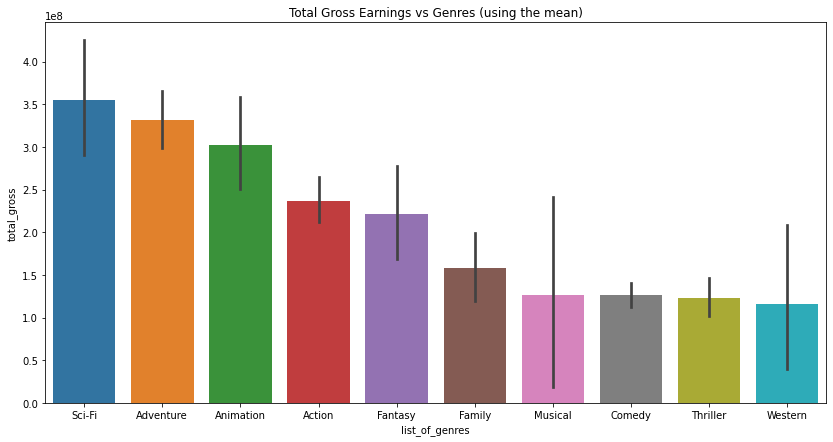

In [32]:
plt.figure(figsize=(14, 7))

sns.barplot(
            x='list_of_genres',
            y='total_gross',
            data=genres_df_sorted,
            order=top_genres);


plt.title('Total Gross Earnings vs Genres (using the mean)');

### Finding #1: Top Grossing Genres

Findings: Based on these results, it is recommended that Microsoft produces Sci-Fi films maximize probablity of sucess and profitability. It is, however, also possible to create films with multiple genres (such as Sci-Fi, Adventure, and Action) and still be profitable.

## Do Runtime Minutes Influence Gross Earnings?

In [33]:
# Use df_no_duplicates dataframe to determine if/how runtime minutes affect
# total gross earnings

run_time_df = df_no_duplicates.copy()
run_time_df

,movie_id,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year,total_gross,list_of_genres
39010,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.00,"Action,Adventure,Sci-Fi",7.30,"665,594.00",BV,"459,000,000.00","946,400,000.00",2015,"1,405,400,000.00","[Action, Adventure, Sci-Fi]"
19050,tt1825683,Black Panther,Black Panther,2018,134.00,"Action,Adventure,Sci-Fi",7.30,"516,148.00",BV,"700,100,000.00","646,900,000.00",2018,"1,347,000,000.00","[Action, Adventure, Sci-Fi]"
42223,tt2527336,Star Wars: The Last Jedi,Star Wars: Episode VIII - The Last Jedi,2017,152.00,"Action,Adventure,Fantasy",7.10,"462,903.00",BV,"620,200,000.00","712,400,000.00",2017,"1,332,600,000.00","[Action, Adventure, Fantasy]"
84414,tt4881806,Jurassic World: Fallen Kingdom,Jurassic World: Fallen Kingdom,2018,128.00,"Action,Adventure,Sci-Fi",6.20,"219,125.00",Uni.,"417,700,000.00","891,800,000.00",2018,"1,309,500,000.00","[Action, Adventure, Sci-Fi]"
6647,tt1323045,Frozen,Frozen,2010,93.00,"Adventure,Drama,Sport",6.20,"62,311.00",BV,"400,700,000.00","875,700,000.00",2013,"1,276,400,000.00","[Adventure, Drama, Sport]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112563,tt6599340,Bluebeard,Haebing,2017,117.00,Thriller,6.40,"1,269.00",Strand,"33,500.00","5,200.00",2010,"38,700.00",[Thriller]
71753,tt4096620,Troublemakers: The Story of Land Art,Troublemakers: The Story of Land Art,2015,72.00,"Biography,Documentary,History",6.50,108.00,FRun,"29,500.00","9,100.00",2016,"38,600.00","[Biography, Documentary, History]"
24172,tt1978447,Policeman,Ha-shoter,2011,105.00,Drama,6.20,766.00,Crnth,"11,300.00","27,000.00",2014,"38,300.00",[Drama]
7416,tt1417067,Cirkus Columbia,Cirkus Columbia,2010,113.00,"Comedy,Drama,Romance",7.30,"2,336.00",Strand,"3,500.00","9,500.00",2012,"13,000.00","[Comedy, Drama, Romance]"


In [34]:
# Sort all movies by runtime minutes in descending order

max_runtime_df = run_time_df.sort_values(by=['runtime_minutes'], ascending=False)
max_runtime_df

,movie_id,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year,total_gross,list_of_genres
6067,tt1236371,Mysteries of Lisbon,Mistérios de Lisboa,2010,272.00,"Drama,Mystery,Romance",7.50,"2,928.00",MBox,"111,000.00","14,900.00",2011,"125,900.00","[Drama, Mystery, Romance]"
56699,tt3313066,Coriolanus,National Theatre Live: Coriolanus,2014,192.00,"Drama,History,War",8.70,"1,347.00",Wein.,"757,000.00","315,000.00",2012,"1,072,000.00","[Drama, History, War]"
73161,tt4169250,M.S. Dhoni: The Untold Story,M.S. Dhoni: The Untold Story,2016,184.00,"Biography,Drama,Sport",7.70,"28,343.00",FIP,"1,800,000.00","26,000,000.00",2016,"27,800,000.00","[Biography, Drama, Sport]"
100712,tt5886728,Another Year,You yi nian,2016,181.00,Documentary,7.20,40.00,SPC,"3,200,000.00","16,500,000.00",2010,"19,700,000.00",[Documentary]
34528,tt2278871,Blue Is the Warmest Color,La vie d'Adèle,2013,180.00,"Drama,Romance",7.80,"124,409.00",IFC,"2,200,000.00","5,200,000.00",2013,"7,400,000.00","[Drama, Romance]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38579,tt2385006,Jerusalem,Jerusalem,2013,44.00,Documentary,7.30,"1,056.00",NGE,"8,000,000.00","1,300,000.00",2013,"9,300,000.00",[Documentary]
8837,tt1529567,Sea Rex 3D: Journey to a Prehistoric World,Sea Rex 3D: Journey to a Prehistoric World,2010,41.00,Documentary,6.90,364.00,3D,"6,100,000.00","9,900,000.00",2010,"16,000,000.00",[Documentary]
45582,tt2713406,Meerkats,Meerkats,2011,40.00,Documentary,7.40,7.00,NGE,"778,000.00","482,000.00",2012,"1,260,000.00",[Documentary]
54321,tt3195742,Journey to the South Pacific,Journey to the South Pacific,2013,40.00,Documentary,6.50,145.00,Imax,"7,600,000.00","6,500,000.00",2013,"14,100,000.00",[Documentary]


### Plot Runtimes vs Total Gross Earnings

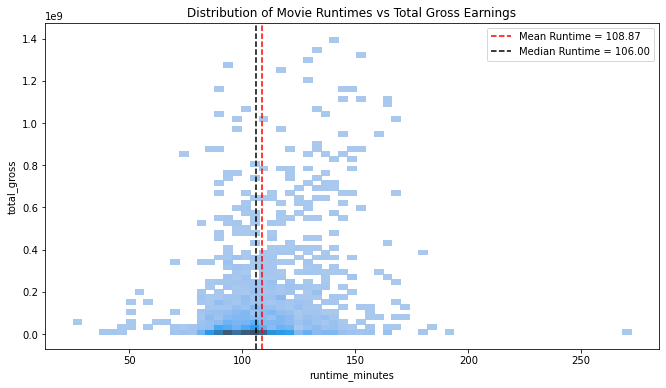

In [35]:
fig, ax = plt.subplots(figsize=(11, 6))
            
sns.histplot(data=max_runtime_df, x='runtime_minutes', 
             y='total_gross', bins='auto')
ax.set(title='Distribution of Movie Runtimes vs Total Gross Earnings');

mean_runtime = round(max_runtime_df['runtime_minutes'].mean(),2)
ax.axvline(mean_runtime, color='red', ls='--',
           label=f"Mean Runtime = {mean_runtime:,.2f}");

median_runtime = round(max_runtime_df['runtime_minutes'].median(),2)
ax.axvline(median_runtime, color='black', ls='--',
           label=f"Median Runtime = {median_runtime:,.2f}");

ax.legend();                    

### Finding #2: Runtime Minutes and Total Gross Earnings

Our findings support that a movie should have a runtime between 100 minutes to 150 minutes in order to maximize the probability of success and profitability. Furthermore, films with less than 80 runtime minutes or more than 165 runtime minutes were not very profitable. 

## Does Production Budget Affect Gross Earnings?

In [36]:
# Use df_no_duplicates dataframe to determing how production budgets affect 
# total gross earnings. 

movie_prod_no_dups = df_no_duplicates.copy()
movie_prod_no_dups

,movie_id,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year,total_gross,list_of_genres
39010,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.00,"Action,Adventure,Sci-Fi",7.30,"665,594.00",BV,"459,000,000.00","946,400,000.00",2015,"1,405,400,000.00","[Action, Adventure, Sci-Fi]"
19050,tt1825683,Black Panther,Black Panther,2018,134.00,"Action,Adventure,Sci-Fi",7.30,"516,148.00",BV,"700,100,000.00","646,900,000.00",2018,"1,347,000,000.00","[Action, Adventure, Sci-Fi]"
42223,tt2527336,Star Wars: The Last Jedi,Star Wars: Episode VIII - The Last Jedi,2017,152.00,"Action,Adventure,Fantasy",7.10,"462,903.00",BV,"620,200,000.00","712,400,000.00",2017,"1,332,600,000.00","[Action, Adventure, Fantasy]"
84414,tt4881806,Jurassic World: Fallen Kingdom,Jurassic World: Fallen Kingdom,2018,128.00,"Action,Adventure,Sci-Fi",6.20,"219,125.00",Uni.,"417,700,000.00","891,800,000.00",2018,"1,309,500,000.00","[Action, Adventure, Sci-Fi]"
6647,tt1323045,Frozen,Frozen,2010,93.00,"Adventure,Drama,Sport",6.20,"62,311.00",BV,"400,700,000.00","875,700,000.00",2013,"1,276,400,000.00","[Adventure, Drama, Sport]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112563,tt6599340,Bluebeard,Haebing,2017,117.00,Thriller,6.40,"1,269.00",Strand,"33,500.00","5,200.00",2010,"38,700.00",[Thriller]
71753,tt4096620,Troublemakers: The Story of Land Art,Troublemakers: The Story of Land Art,2015,72.00,"Biography,Documentary,History",6.50,108.00,FRun,"29,500.00","9,100.00",2016,"38,600.00","[Biography, Documentary, History]"
24172,tt1978447,Policeman,Ha-shoter,2011,105.00,Drama,6.20,766.00,Crnth,"11,300.00","27,000.00",2014,"38,300.00",[Drama]
7416,tt1417067,Cirkus Columbia,Cirkus Columbia,2010,113.00,"Comedy,Drama,Romance",7.30,"2,336.00",Strand,"3,500.00","9,500.00",2012,"13,000.00","[Comedy, Drama, Romance]"


In [37]:
# Call movie_budget data

movie_budget_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [38]:
# Rename 'movie' column to 'original_title' in order to join dataframes later 

movie_budget_df.rename(columns={'movie': 'original_title'}, inplace=True)
movie_budget_df

,id,release_date,original_title,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [39]:
# Drop columns from movie_budget_df that are NOT neededfor our analysis 

movie_budget_dropped = movie_budget_df.drop(columns=['release_date', 'domestic_gross', 'worldwide_gross'])
movie_budget_dropped

,id,original_title,production_budget
0,1,Avatar,"$425,000,000"
1,2,Pirates of the Caribbean: On Stranger Tides,"$410,600,000"
2,3,Dark Phoenix,"$350,000,000"
3,4,Avengers: Age of Ultron,"$330,600,000"
4,5,Star Wars Ep. VIII: The Last Jedi,"$317,000,000"
...,...,...,...
5777,78,Red 11,"$7,000"
5778,79,Following,"$6,000"
5779,80,Return to the Land of Wonders,"$5,000"
5780,81,A Plague So Pleasant,"$1,400"


In [40]:
# Need to remove '$' production_budget column 
movie_budget_dropped['production_budget'] = movie_budget_dropped['production_budget'].str.replace('$','')
movie_budget_dropped['production_budget']

0       425,000,000
1       410,600,000
2       350,000,000
3       330,600,000
4       317,000,000
           ...     
5777          7,000
5778          6,000
5779          5,000
5780          1,400
5781          1,100
Name: production_budget, Length: 5782, dtype: object

In [41]:
# Need to remove ',' from production_budget column
movie_budget_dropped['production_budget'] = movie_budget_dropped['production_budget'].str.replace(',','')
movie_budget_dropped['production_budget']

0       425000000
1       410600000
2       350000000
3       330600000
4       317000000
          ...    
5777         7000
5778         6000
5779         5000
5780         1400
5781         1100
Name: production_budget, Length: 5782, dtype: object

In [42]:
# Conver string type to float

movie_budget_dropped['production_budget'] = movie_budget_dropped['production_budget'].astype(float)
movie_budget_dropped

,id,original_title,production_budget
0,1,Avatar,"425,000,000.00"
1,2,Pirates of the Caribbean: On Stranger Tides,"410,600,000.00"
2,3,Dark Phoenix,"350,000,000.00"
3,4,Avengers: Age of Ultron,"330,600,000.00"
4,5,Star Wars Ep. VIII: The Last Jedi,"317,000,000.00"
...,...,...,...
5777,78,Red 11,"7,000.00"
5778,79,Following,"6,000.00"
5779,80,Return to the Land of Wonders,"5,000.00"
5780,81,A Plague So Pleasant,"1,400.00"


In [43]:
# JOIN movie_prod_no_dups and movie_budget_dropped 
# and assign to movie_production_df variable. 

movie_production_df = pd.merge(movie_prod_no_dups, movie_budget_dropped, how='inner', on='original_title')
movie_production_df

,movie_id,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year,total_gross,list_of_genres,id,production_budget
0,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.00,"Action,Adventure,Sci-Fi",7.30,"665,594.00",BV,"459,000,000.00","946,400,000.00",2015,"1,405,400,000.00","[Action, Adventure, Sci-Fi]",4,"330,600,000.00"
1,tt1825683,Black Panther,Black Panther,2018,134.00,"Action,Adventure,Sci-Fi",7.30,"516,148.00",BV,"700,100,000.00","646,900,000.00",2018,"1,347,000,000.00","[Action, Adventure, Sci-Fi]",42,"200,000,000.00"
2,tt4881806,Jurassic World: Fallen Kingdom,Jurassic World: Fallen Kingdom,2018,128.00,"Action,Adventure,Sci-Fi",6.20,"219,125.00",Uni.,"417,700,000.00","891,800,000.00",2018,"1,309,500,000.00","[Action, Adventure, Sci-Fi]",13,"170,000,000.00"
3,tt1323045,Frozen,Frozen,2010,93.00,"Adventure,Drama,Sport",6.20,"62,311.00",BV,"400,700,000.00","875,700,000.00",2013,"1,276,400,000.00","[Adventure, Drama, Sport]",56,"150,000,000.00"
4,tt3606756,Incredibles 2,Incredibles 2,2018,118.00,"Action,Adventure,Animation",7.70,"203,510.00",BV,"608,600,000.00","634,200,000.00",2018,"1,242,800,000.00","[Action, Adventure, Animation]",44,"200,000,000.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,tt1183923,Welcome to the Rileys,Welcome to the Rileys,2010,110.00,Drama,7.00,"22,210.00",Gold.,"159,000.00","158,000.00",2010,"317,000.00",[Drama],12,"10,000,000.00"
1004,tt2387589,The Girl on the Train,The Girl on the Train,2013,80.00,Thriller,4.40,819.00,Strand,"208,000.00","97,100.00",2010,"305,100.00",[Thriller],68,"45,000,000.00"
1005,tt6333056,City of Ghosts,City of Ghosts,2017,92.00,"Documentary,War",7.40,"2,925.00",IFC,"128,000.00","100,000.00",2017,"228,000.00","[Documentary, War]",64,"17,500,000.00"
1006,tt1788391,Kill List,Kill List,2011,95.00,"Crime,Drama,Horror",6.40,"32,807.00",IFC,"29,100.00","143,000.00",2012,"172,100.00","[Crime, Drama, Horror]",70,"800,000.00"


### Plot Total Gross vs Budget and Genres

In [45]:
movie_production_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1008 entries, 0 to 1007
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           1008 non-null   object 
 1   title              1008 non-null   object 
 2   original_title     1008 non-null   object 
 3   start_year         1008 non-null   int64  
 4   runtime_minutes    1008 non-null   float64
 5   genres             1008 non-null   object 
 6   averagerating      1008 non-null   float64
 7   numvotes           1008 non-null   float64
 8   studio             1008 non-null   object 
 9   domestic_gross     1008 non-null   float64
 10  foreign_gross      1008 non-null   float64
 11  year               1008 non-null   int64  
 12  total_gross        1008 non-null   float64
 13  list_of_genres     1008 non-null   object 
 14  id                 1008 non-null   int64  
 15  production_budget  1008 non-null   float64
dtypes: float64(7), int64(3),

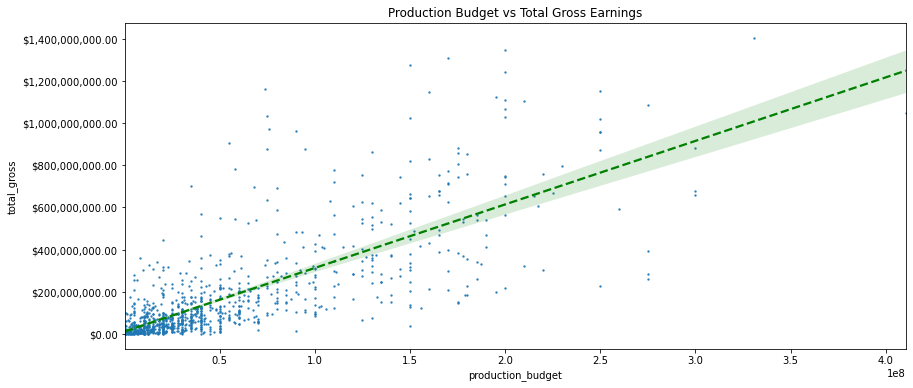

In [46]:
# Relationship between Total Gross and Production Budget

fig, ax = plt.subplots(figsize=(14,6))

price_fmt = mpl.ticker.StrMethodFormatter('${x:,.2f}')

# Plot 0
sns.regplot(data=movie_production_df, x='production_budget', y='total_gross',
           ax=ax, scatter_kws={'s':2}, line_kws={'color':'green', 'ls':'--'})

ax.set_title('Production Budget vs Total Gross Earnings')
ax.yaxis.set_major_formatter(price_fmt)

### Finding #3: Production Budgets and Total Gross Earnings

Our results indicate that there is a POSITIVE relationship between production budgets and total gross earnings. In short, a greater production budget renders higher total gross earnings. As always, there is no guarantee of success or profitability. 

# Conclusions

Based on the three findings of our analysis, in order to increase the probability of success and profitability, Microsoft should:

- Create Sci-Fi films since that genre has the highest total gross earnings. Creating films that fall into any of the top 5 grossing genres will also generate high revenues. 

- Set runtime range between 100 minutes - 150 minutes. Avoid runtimes less than 80 minutes and greater than 165 minutes as those runtimes are not profitable.

- Maximize production budget in order to maximize  total gross earnings.

## Next Steps

- Calculate actual ROI results to determine a more accurate budget range.